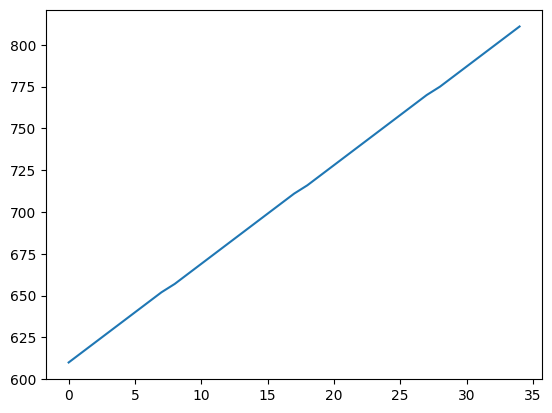

c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:77: RuntimeWarning: divide by zero encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:77: RuntimeWarning: invalid value encountered in divide
  sides = (np.arctan(np.abs(np.arange(height)[:, np.newaxis] - center_y)/


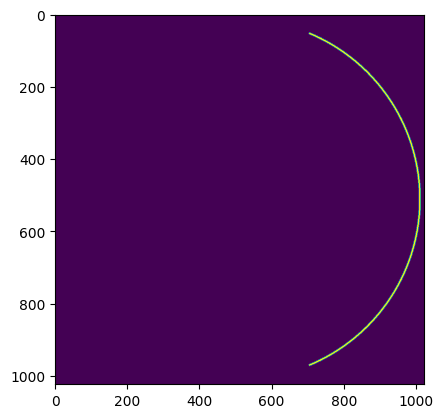

Processing subtraction for image  0
Processing subtraction for image  1
Processing subtraction for image  2
Processing subtraction for image  3
Processing subtraction for image  4
Processing subtraction for image  5
Processing subtraction for image  6
Processing subtraction for image  7
Processing subtraction for image  8
Processing subtraction for image  9
Processing subtraction for image  10
Processing subtraction for image  11
Processing subtraction for image  12
Processing subtraction for image  13
Processing subtraction for image  14
Processing subtraction for image  15
Processing subtraction for image  16
Processing subtraction for image  17
Processing subtraction for image  18
Processing subtraction for image  19
Processing subtraction for image  20
Processing subtraction for image  21
Processing subtraction for image  22
Processing subtraction for image  23
Processing subtraction for image  24
Processing subtraction for image  25
Processing subtraction for image  26
Processing 

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


# Array of the front of the CME through human analysis
# A linear fit is applied to the data to interpolate the front at each time step

#original
front_array_absolute = [[512,608],[512,640],[512,671],[512,702],[512,730],[512,761],[512,783]]

# +50
# front_array_absolute = [[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230]]

# -10
# front_array_absolute = [[512,413],[512,392],[512,356],[512,330],[512,304],[512,275],[512,252]]

#                                                           
front_array_absolute = np.array(front_array_absolute)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), front_array_absolute[:,1])
front_array_absolute = np.zeros((35,2), dtype=int)
front_array_absolute[:,0] = np.full(35, 512)
front_array_absolute[:,1] = np.floor((linearFunc(np.arange(15,50), *parameters)))


# Plot the front of the CME as a function of timestep
plt.figure()
plt.plot(front_array_absolute[:,1])
plt.show()


# Define the region of interest depending on where the CME is located

# xMin = 0
# xMax = 500
xMin = 500
xMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(15,50,1):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 5
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))

allIndices = calculateRadialBands(pBdata[0],direction='right')

# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')
# pBdataSubtract = medianOverTime(pBdata)
# tBdataSubtract = medianOverTime(tBdata)

# plt.figure()
# plt.imshow(pBdataSubtract, norm=LogNorm())
# plt.figure()
# plt.imshow(tBdataSubtract, norm=LogNorm())
# plt.show()
# print(np.array(pBdata).shape)
# print(pBdataSubtract.shape)

epsilonArray = np.zeros(len(pBdata))

# testSub = np.zeros((1024,1024))

# median_values_pb, r_values = calculateMedianPixelValuesOverTime(pBdata,allIndices)
# median_values_tb, r_values = calculateMedianPixelValuesOverTime(tBdata,allIndices)

# testSubpB = subtractRadialMedianOld(testSub, median_values_pb)   
# testSubtB = subtractRadialMedianOld(testSub,median_values_tb)  
# plt.figure()
# plt.imshow(-testSubpB, norm=LogNorm())
# plt.colorbar()
# plt.figure()
# plt.imshow(-testSubtB, norm=LogNorm())
# plt.colorbar()
# plt.show()


for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 

    #Radial median subtraction:

    median_values_pb, r_values = calculateMedianPixelValues(pBdata[i],allIndices)
    median_values_tb, r_values = calculateMedianPixelValues(tBdata[i],allIndices)
    # pBdata[i] = pBdata[i] - testSubpB  
    # tBdata[i] = tBdata[i] - testSubtB
    pBdata[i] = subtractRadialMedianOld(pBdata[i], median_values_pb)
    tBdata[i] = subtractRadialMedianOld(tBdata[i], median_values_tb)
    
  
    # Function fit subtraction:
    # pBdata[i] = functionFitSubtract(pBdata[i], front_array_absolute[i,:], 'right')
    # tBdata[i] = functionFitSubtract(tBdata[i], front_array_absolute[i,:], 'right')

    # pBdata[i] = pBdata[i] - pBdataSubtract
    # tBdata[i] = tBdata[i] - tBdataSubtract
    
    



In [2]:

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat, epsilonArray[i]= calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax), front_array_absolute[i,:], type = 'Xi')
    posMats[i] = posMat
    negMats[i] = negMat

Processing calculations for image  0


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:18: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:41: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:42: RuntimeWarning: invalid value encountered in sqrt
  angleMatrixNegative[i][j] = epsilon + np.rad2deg(np.arcsin(-np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:41: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixPositive[i][j] = epsilon + np.rad2deg(np.arcsin(np.sqrt((1 - pBratio)/(1 + pBratio))))
c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:42: RuntimeWarning: invalid value encountered in arcsin
  angleMatrixNegative[i][j] = epsilon + np.rad2de

Processing calculations for image  1
Processing calculations for image  2


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:18: RuntimeWarning: divide by zero encountered in divide
  pBratioFull = image_data_pB/image_data_tB


Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10
Processing calculations for image  11
Processing calculations for image  12
Processing calculations for image  13
Processing calculations for image  14
Processing calculations for image  15
Processing calculations for image  16
Processing calculations for image  17
Processing calculations for image  18
Processing calculations for image  19
Processing calculations for image  20
Processing calculations for image  21
Processing calculations for image  22
Processing calculations for image  23
Processing calculations for image  24
Processing calculations for image  25
Processing calculations for image  26
Processing calculations for image  27
Processing calculations for image  28
Processing calculat

[25.58717753 26.5082326  27.34158247 28.3050354  29.05114386 29.73269253
 30.56763387 31.44798051 32.38197397 32.86647767 33.55869347 34.2232933
 35.01159606 35.56939964 36.08931899 36.58310927 37.189825   37.93169212
 38.65213039 39.1292209  39.53666918 39.90593233 40.23295119 40.76908208
 41.32713514 41.89403989 42.37458915 42.7314946  43.30004557 43.6258597
 43.95506423 44.37641158 45.05544962 45.88017754 46.81460189]
[-8.36061503 -8.2269826  -8.00564497 -7.9144104  -7.60583136 -7.23269253
 -7.01294637 -6.83860551 -6.89369272 -6.32350892 -5.96103722 -5.57094955
 -5.30456481 -4.80768089 -4.27291274 -3.71201552 -3.26404375 -2.95122337
 -2.79275539 -2.2151584  -1.56791918 -0.88249483 -0.15482619  0.36373042
  0.86036486  1.34814761  1.92228585  2.6200679   2.93042318  3.65929655
  4.38477952  5.01811967  5.39376913  5.62372871  5.74399186]
pos m:  0.5857262161365444
pos b:  27.17144613270025
pos mean:  37.128791807021514
pos sigma: 5.953080151070735
neg m:  0.45128468197269944
neg b:  

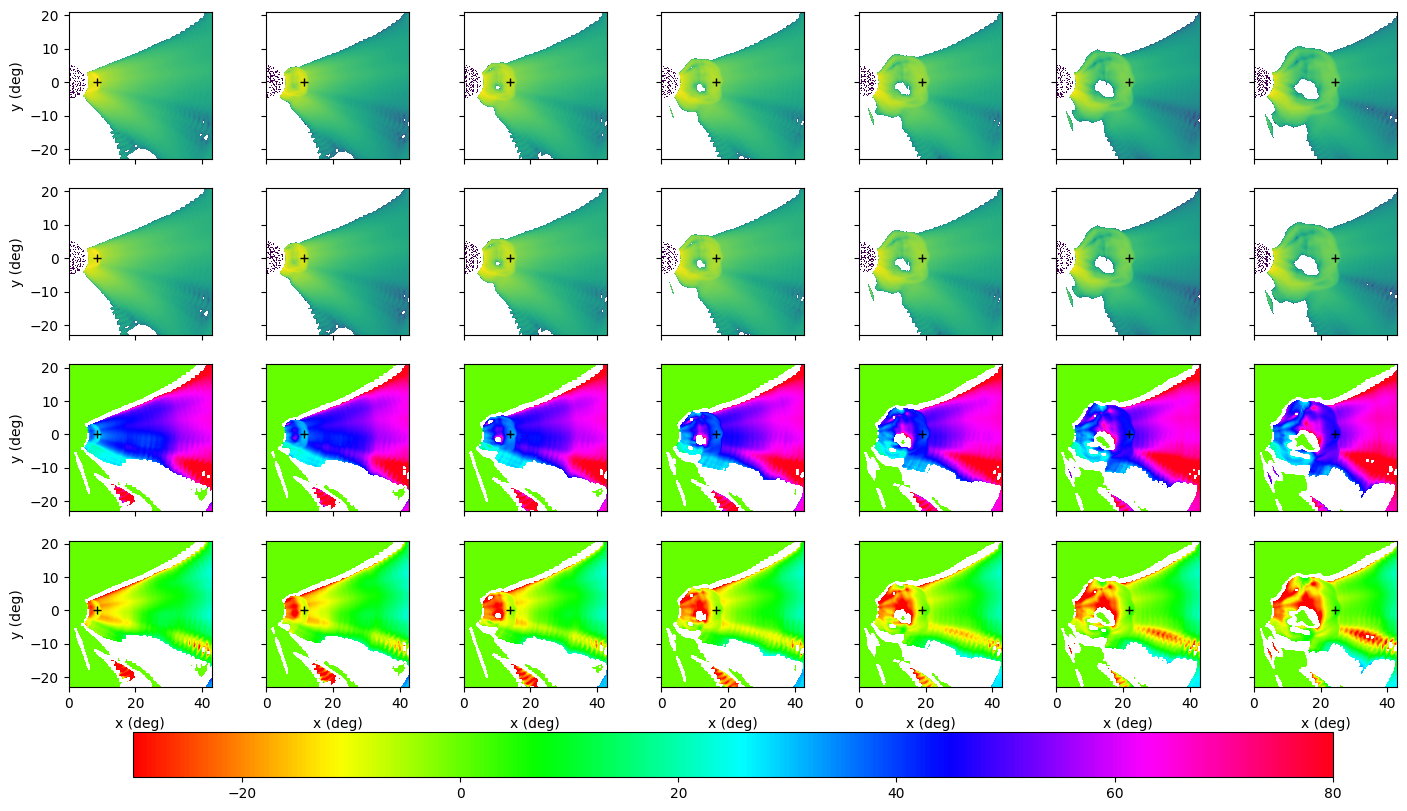

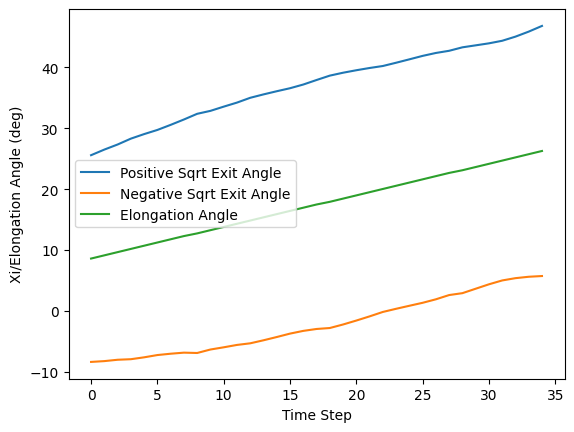

In [3]:
# xMin = 0
# xMax = 500
xMin = 512
xMax = 1000

yMin = 250
yMax = 750


# vmin = 60
# vmax = 150
vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([512,512])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(4,7,figsize=(15, 9), sharex=True, sharey=True)



for i in range(7): 
    
    axs[0,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0],)
    axs[1,i].imshow(pBdata[5*i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm(), extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    axs[2,i].imshow(posMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin = vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    im = axs[3,i].imshow(negMats[5*i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv', extent=[(xMin - 512)*45/512.0, (xMax-512)*45/512.0, (yMin - 512)*45/512.0 , (yMax - 512)*45/512.0])
    
for i in range(4):
    axs[i,0].set_ylabel('y (deg)')
    

for i in range(7):
    axs[3,i].set_xlabel('x (deg)')



for i in range(7):
    axs[0,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[1,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[2,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')
    axs[3,i].plot(front_array_adj[5*i][1]*45/512.0, front_array_adj[5*i][0]*45/512.0, 'k+')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph)
print(negMatsGraph)

posCoef = np.polyfit(np.arange(0,35),posMatsGraph,1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph))
print("pos sigma:", np.std(posMatsGraph))



negCoef = np.polyfit(np.arange(0,35),negMatsGraph,1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph))
print("neg sigma:", np.std(negMatsGraph))
# poly1d_fn = np.poly1d(posCoef) 


fig, axs = plt.subplots()  
axs.plot(posMatsGraph, label='Positive Sqrt Exit Angle')
axs.plot(negMatsGraph, label='Negative Sqrt Exit Angle') 
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='center left') 
plt.show()

In [4]:

print(front_array_adj[2])
print(posMatsData[2][front_array_adj[2][0],front_array_adj[2][1]])

[  0 110]
0.0
